In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# Functions for analysis

In [32]:
def create_graph(file_path):
    '''
    Reads file with an edgelist and creates NetworkX graph from it.

    Parameters:
        file_path (str): Path to the file containing the edge list.

    Returns:
        G (networkx.Graph): Graph created from the edgelist.
    '''
    G = nx.Graph() # Create an empty graph object
    with open(file_path, 'r') as file: # Open the file containing the edgelist
        for line in file:
            node1, node2 = line.strip().split('\t') # Split ech line by the tab into two nodes
            G.add_edge(node1, node2) # Add edges to the graph
    return G

In [22]:
def analyze_graph(G):
    '''
    Calculates and prints basic properties of the graph and returns the degree sequence.

    Parameters:
        G (networkx.Graph): Graph for which properties are calculated.

    Returns:
        degree_sequence (list): Degree sequence of nodes sorted in descending order.
    '''

    # Calculate number of nodes, edges and density of the graph
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    possible_edges = num_nodes * (num_nodes - 1) / 2
    density = num_edges / possible_edges if possible_edges > 0 else np.nan

    # Print the graph properties
    print(f"No. of nodes: {num_nodes}")
    print(f"No. of edges: {num_edges}")
    print(f"Possible edges: {possible_edges}")
    print(f"Density of network: {density:.4f}")

    # Generate the degree sequence and sort in descending order
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    return degree_sequence

In [23]:
def plot_degree_distribution(G, degree_sequence, plot_title = None, save_path = None):
    '''
    Plots the degree distribution of the graph on a log-log scale.

    Parameters:
        G (networkx.Graph): Graph whose degree distribution is plotted.
        degree_sequence (list): List of node degrees sorted in descending order.
        title (str, optional): Title for the plot.
        save_path (str, optional): Path to save the plot as a PDF.
    '''

    # Calcualting the frequency of every degree
    degree_count = np.bincount(degree_sequence) # Counts how often each integer appears in the degree sequence
    degrees = np.arange(len(degree_count)) # Creates an array with indices for each possible degree
    degrees = degrees[degree_count > 0] # Removes all degrees from the array where the node count is zero
    degree_count = degree_count[degree_count > 0] # Removes all zero counts in the degree count
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.scatter(degrees, degree_count, color='darkblue', edgecolor='black', s = 70)
    
    # Set logarithmic scales for both axes
    plt.xscale('log')
    plt.yscale('log')

    # Add labels and adjust fontsize
    plt.xlabel('Degree', fontsize = 30)
    plt.ylabel('Number of Nodes', fontsize = 30)
    plt.xticks(fontsize = 30)
    plt.yticks(fontsize = 30)
    plt.title(plot_title, fontsize = 30)
    
    # Add trend line for reference
    z = np.polyfit(np.log(degrees), np.log(degree_count), 1) # Apply a logarithmic transformation to the degrees and their counts and fit a line to the log transformed data
    p = np.poly1d(z) # Create a polynomial object
    plt.plot(degrees, np.exp(p(np.log(degrees))), color='black') # Convert back to original scale and plot trendline

    plt.tight_layout()
    #Save the plot as pdf if a save path specified
    if save_path:
        plt.savefig(save_path, format = 'pdf')

    plt.show()

In [24]:
# Hauptfunktion
def main(filepath, plot_title = None, save_path = None):
    '''
    Main function to read a graph from a file, analyze its properties, and plot its degree distribution.

    Parameters:
        filepath (str): path to tsv file containing the edge list.
        plot_title (str, optional): Title for the degree distribution plot.
        save_path (str, optional): Path to the location the save the plot as PDF.
    '''
    
    # Create graph from tsv file containing an edgelist
    G = create_graph(filepath)

    # Calculate basic graph properties and retrieve the degree sequence
    degree_sequence = analyze_graph(G)

    # Plot the degree distribution
    plot_degree_distribution(G, degree_sequence, plot_title, save_path)

# Analysis

No. of nodes: 3047
No. of edges: 84565
Possible edges: 4640581.0
Density of network: 0.0182


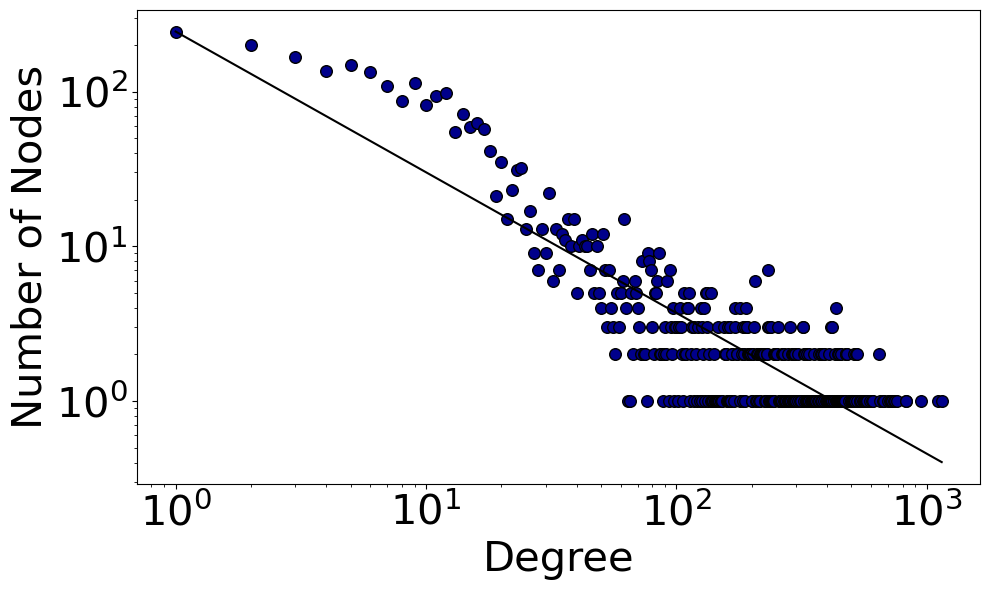

No. of nodes: 3047
No. of edges: 36217
Possible edges: 4640581.0
Density of network: 0.0078


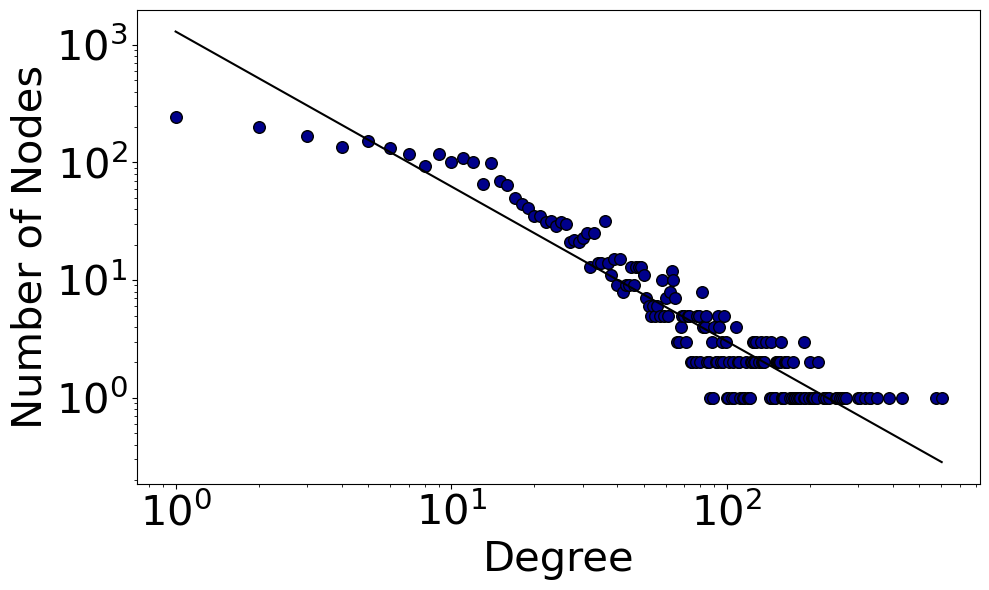

No. of nodes: 3172
No. of edges: 83077
Possible edges: 5029206.0
Density of network: 0.0165


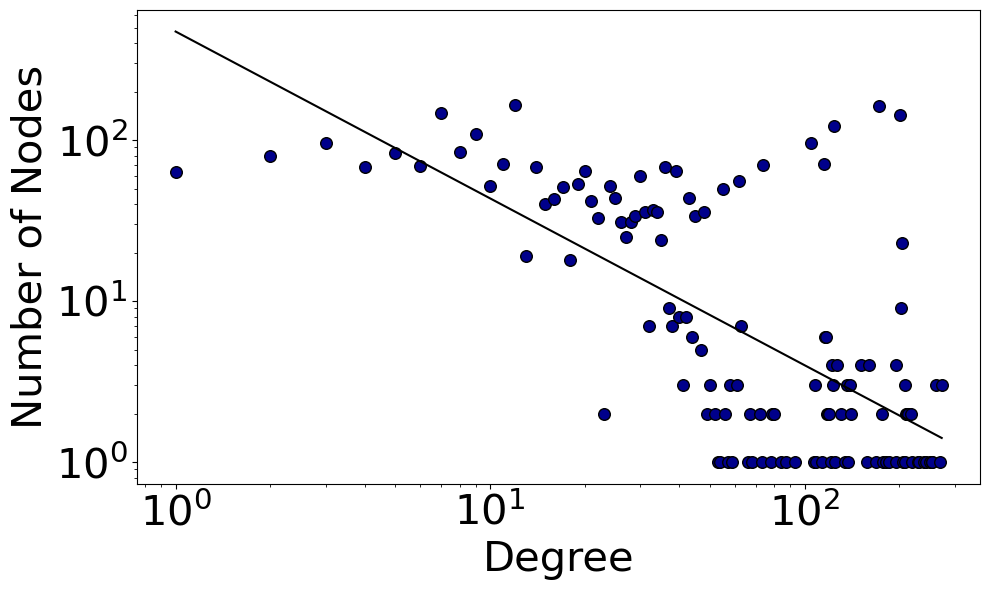

No. of nodes: 3172
No. of edges: 71424
Possible edges: 5029206.0
Density of network: 0.0142


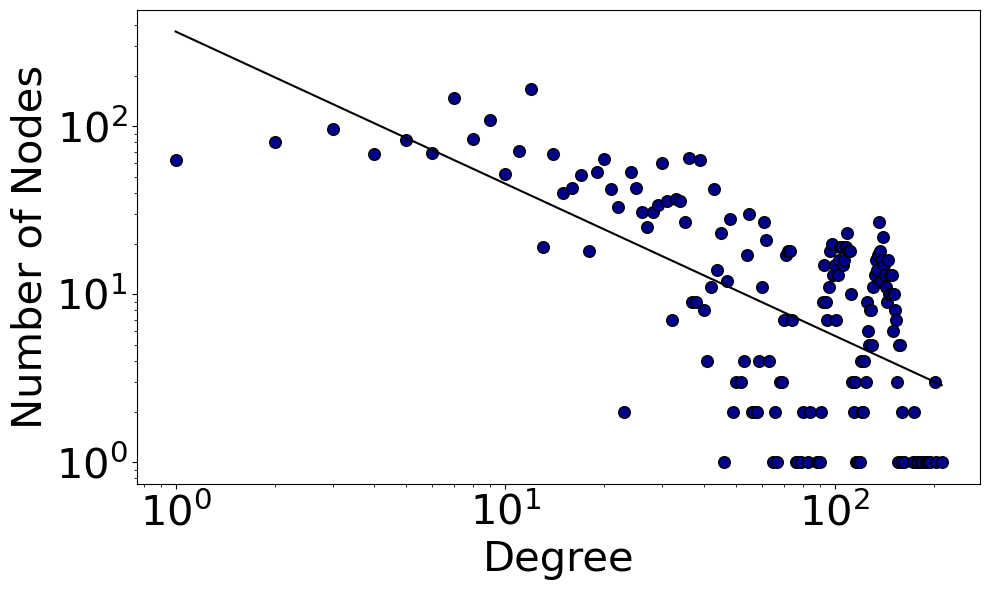

No. of nodes: 772
No. of edges: 10206
Possible edges: 297606.0
Density of network: 0.0343


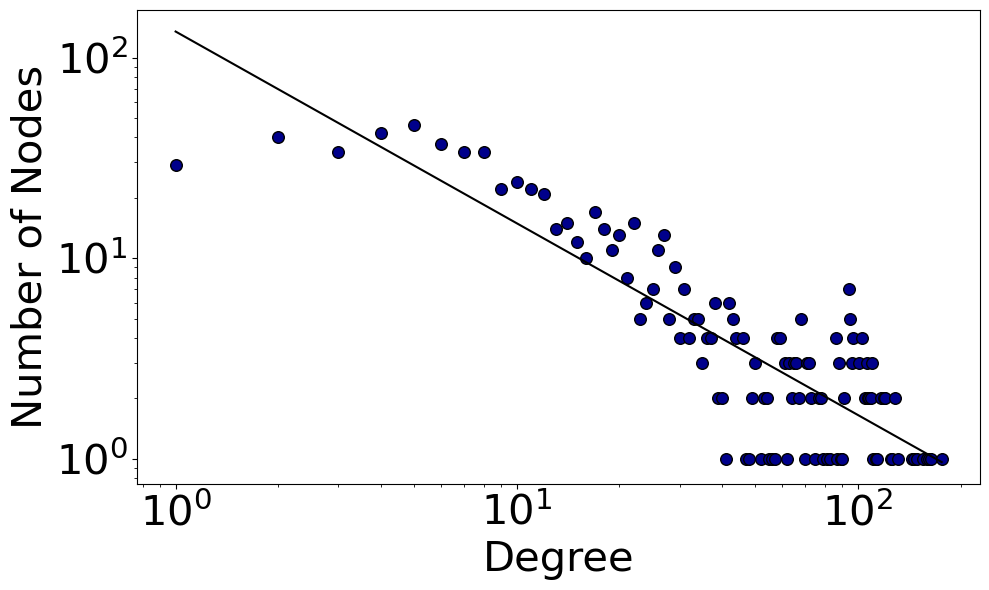

No. of nodes: 772
No. of edges: 6961
Possible edges: 297606.0
Density of network: 0.0234


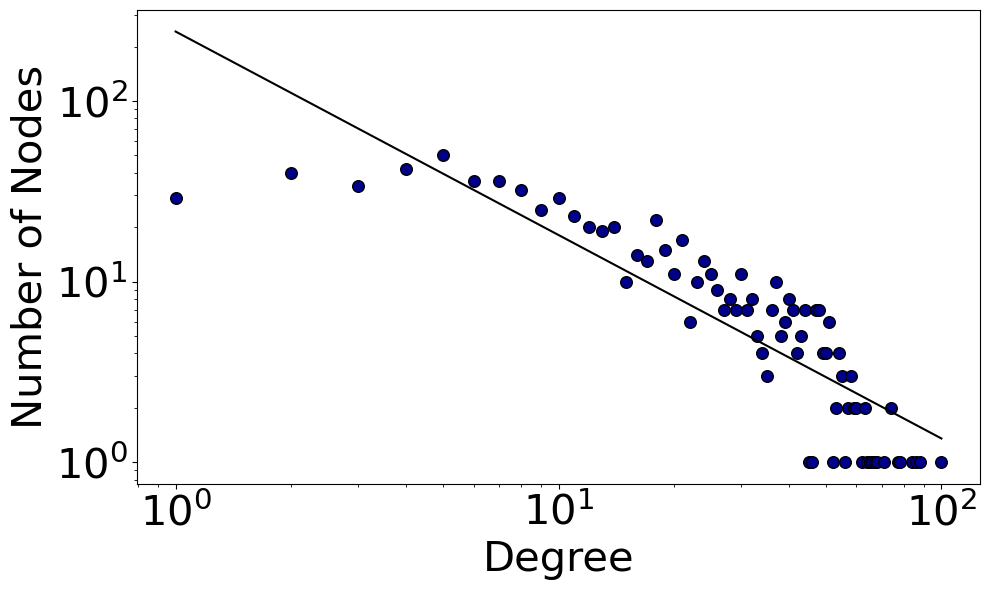

In [39]:
networks = ['disease_on_genes', 'disease_on_symptoms', 'disease_on_drugs']

for layer in networks:
    non_spars_path = f'/Users/marlene/Documents/data/GitHub/masters-thesis/00_Data/Non_sparsified_networks/{layer}.tsv'
    main(non_spars_path)
    spars_path = f'/Users/marlene/Documents/data/GitHub/masters-thesis/00_Data/Sparsified_networks/{layer}.tsv'
    main(spars_path)